# Statistics Part 2

This assignment covers theoretical concepts and practical implementations of hypothesis testing, confidence intervals, ANOVA, Chi-square tests, and more.

## Theoretical Questions

### 1. What is hypothesis testing in statistics?
Hypothesis testing is a statistical method used to make decisions about population parameters based on sample data. It involves formulating two hypotheses: the null hypothesis ($ H_0 $) and the alternative hypothesis ($ H_a $).

### 2. What is the null hypothesis, and how does it differ from the alternative hypothesis?
- Null Hypothesis ($ H_0 $): Assumes no effect or no difference (e.g., mean = 0).
- Alternative Hypothesis ($ H_a $): Suggests an effect or difference (e.g., mean ≠ 0).

### 3. What is the significance level in hypothesis testing, and why is it important?
The significance level ($ \alpha $) is the threshold for rejecting $ H_0 $. Common values are 0.05 or 0.01. It controls the probability of Type 1 errors.

### 4. What does a P-value represent in hypothesis testing?
The P-value is the probability of observing the test statistic (or something more extreme) under $ H_0 $. A small P-value (< $ \alpha $) leads to rejecting $ H_0 $.

### 5. How do you interpret the P-value in hypothesis testing?
- If P-value < $ \alpha $: Reject $ H_0 $.
- If P-value ≥ $ \alpha $: Fail to reject $ H_0 $.

### 6. What are Type 1 and Type 2 errors in hypothesis testing?
- Type 1 Error: Rejecting $ H_0 $ when it is true.
- Type 2 Error: Failing to reject $ H_0 $ when $ H_a $ is true.

### 7. What is the difference between a one-tailed and a two-tailed test in hypothesis testing?
- One-tailed: Tests for effects in one direction (e.g., mean > 0).
- Two-tailed: Tests for effects in either direction (e.g., mean ≠ 0).

### 8. What is the Z-test, and when is it used in hypothesis testing?
A Z-test compares a sample mean to a known population mean when the population standard deviation is known.

### 9. How do you calculate the Z-score, and what does it represent in hypothesis testing?
$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
$$
It measures how many standard deviations the sample mean is from the population mean.

### 10. What is the T-distribution, and when should it be used instead of the normal distribution?
The T-distribution is used when the sample size is small ($ n < 30 $) and the population standard deviation is unknown.

### 11. What is the difference between a Z-test and a T-test?
- Z-test: Requires known population standard deviation.
- T-test: Used when the population standard deviation is unknown.

### 12. What is the T-test, and how is it used in hypothesis testing?
A T-test compares the means of two groups or a sample mean to a population mean.

### 13. What is the relationship between Z-test and T-test in hypothesis testing?
Both compare means, but the T-test uses the T-distribution for smaller samples, while the Z-test uses the normal distribution.

### 14. What is a confidence interval, and how is it used to interpret statistical results?
A confidence interval provides a range of plausible values for a population parameter with a specified confidence level.

### 15. What is the margin of error, and how does it affect the confidence interval?
The margin of error determines the width of the confidence interval. Larger margins result in wider intervals.

### 16. How is Bayes' Theorem used in statistics, and what is its significance?
Bayes' Theorem updates probabilities based on new evidence:
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

### 17. What is the Chi-square distribution, and when is it used?
The Chi-square distribution is used in tests of independence and goodness-of-fit.

### 18. What is the Chi-square goodness of fit test, and how is it applied?
It compares observed frequencies to expected frequencies to determine if they match.

### 19. What is the F-distribution, and when is it used in hypothesis testing?
The F-distribution is used in ANOVA and F-tests to compare variances.

### 20. What is an ANOVA test, and what are its assumptions?
ANOVA tests whether the means of multiple groups are equal. Assumptions include normality, independence, and equal variance.

### 21. What are the different types of ANOVA tests?
- One-way ANOVA: Compares means across one factor.
- Two-way ANOVA: Compares means across two factors.

### 22. What is the F-test, and how does it relate to hypothesis testing?
The F-test compares variances between groups to determine if they are significantly different.

###Practical Questions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind, ttest_rel, chi2_contingency, f_oneway, ttest_1samp

In [4]:
# 1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean
sample_mean = 52
pop_mean = 50
pop_std = 10
n = 100

z_stat = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_stat)))  # Two-tailed test

print(f"Z-statistic: {z_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Z-statistic: 2.00, P-value: 0.0455
Reject the null hypothesis


In [5]:
# 2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value
data = np.random.normal(50, 10, 100)
sample_mean = np.mean(data)
z_stat = (sample_mean - 50) / (10 / np.sqrt(100))
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Sample Mean: {sample_mean:.2f}, Z-statistic: {z_stat:.2f}, P-value: {p_value:.4f}")

Sample Mean: 48.67, Z-statistic: -1.33, P-value: 0.1841


In [6]:
# 3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean
data = np.random.normal(50, 10, 100)
pop_mean = 50
pop_std = 10
n = len(data)

z_stat = (np.mean(data) - pop_mean) / (pop_std / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Z-statistic: {z_stat:.2f}, P-value: {p_value:.4f}")

Z-statistic: 0.28, P-value: 0.7800


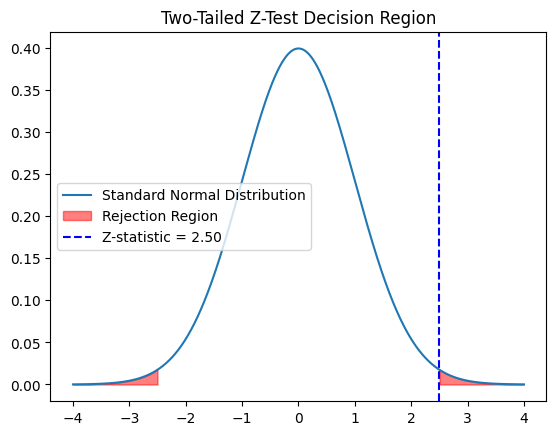

In [7]:
# 4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot
z_stat = 2.5
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x)

plt.plot(x, pdf, label="Standard Normal Distribution")
plt.fill_between(x[x <= -abs(z_stat)], pdf[x <= -abs(z_stat)], color='red', alpha=0.5, label="Rejection Region")
plt.fill_between(x[x >= abs(z_stat)], pdf[x >= abs(z_stat)], color='red', alpha=0.5)
plt.axvline(z_stat, color='blue', linestyle='--', label=f"Z-statistic = {z_stat:.2f}")
plt.legend()
plt.title("Two-Tailed Z-Test Decision Region")
plt.show()

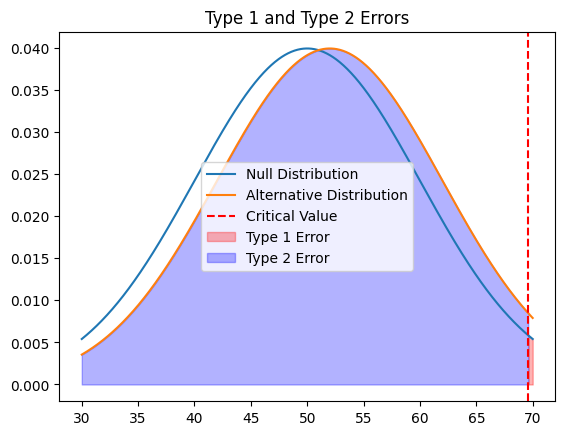

In [8]:
# 5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing
mu0, mu1, sigma = 50, 52, 10
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

x = np.linspace(30, 70, 1000)
null_dist = norm.pdf(x, loc=mu0, scale=sigma)
alt_dist = norm.pdf(x, loc=mu1, scale=sigma)

plt.plot(x, null_dist, label="Null Distribution")
plt.plot(x, alt_dist, label="Alternative Distribution")
plt.axvline(mu0 + z_critical * sigma, color='red', linestyle='--', label="Critical Value")
plt.fill_between(x[x >= mu0 + z_critical * sigma], null_dist[x >= mu0 + z_critical * sigma], color='red', alpha=0.3, label="Type 1 Error")
plt.fill_between(x[x <= mu0 + z_critical * sigma], alt_dist[x <= mu0 + z_critical * sigma], color='blue', alpha=0.3, label="Type 2 Error")
plt.legend()
plt.title("Type 1 and Type 2 Errors")
plt.show()

In [9]:
# 6. Write a Python program to perform an independent T-test and interpret the results
group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(55, 10, 100)

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: -3.57, P-value: 0.0005
Reject the null hypothesis


T-statistic: -11.49, P-value: 0.0000


<ipython-input-10-646e23afceef>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=["Before", "After"])


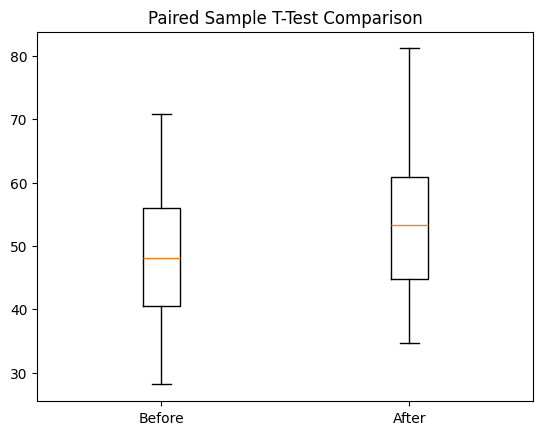

In [10]:
# 7. Perform a paired sample T-test using Python and visualize the comparison results
before = np.random.normal(50, 10, 100)
after = before + np.random.normal(5, 5, 100)

t_stat, p_value = ttest_rel(before, after)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

plt.boxplot([before, after], labels=["Before", "After"])
plt.title("Paired Sample T-Test Comparison")
plt.show()

In [11]:
# 8. Simulate data and perform both Z-test and T-test, then compare the results using Python
data = np.random.normal(50, 10, 100)
pop_mean = 50

# Z-test
z_stat = (np.mean(data) - pop_mean) / (10 / np.sqrt(len(data)))
p_z = 2 * (1 - norm.cdf(abs(z_stat)))

# T-test
t_stat, p_t = ttest_1samp(data, pop_mean)

print(f"Z-test: Z-statistic = {z_stat:.2f}, P-value = {p_z:.4f}")
print(f"T-test: T-statistic = {t_stat:.2f}, P-value = {p_t:.4f}")

Z-test: Z-statistic = 0.44, P-value = 0.6601
T-test: T-statistic = 0.45, P-value = 0.6526


In [12]:
# 9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    margin = norm.ppf((1 + confidence) / 2) * (std_dev / np.sqrt(len(data)))
    return mean - margin, mean + margin

data = np.random.normal(50, 10, 100)
lower, upper = confidence_interval(data)
print(f"Confidence Interval: ({lower:.2f}, {upper:.2f})")

Confidence Interval: (48.62, 52.51)


In [13]:
# 10. Write a Python program to calculate the margin of error for a given confidence level using sample data
def margin_of_error(data, confidence=0.95):
    std_dev = np.std(data, ddof=1)
    n = len(data)
    return norm.ppf((1 + confidence) / 2) * (std_dev / np.sqrt(n))

data = np.random.normal(50, 10, 100)
error = margin_of_error(data)
print(f"Margin of Error: {error:.2f}")

Margin of Error: 2.11


In [14]:
# 11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process
def bayes_theorem(prior, likelihood, evidence):
    return (likelihood * prior) / evidence

prior = 0.3  # Prior probability
likelihood = 0.8  # Likelihood of observing evidence given hypothesis
evidence = 0.5  # Total probability of observing evidence

posterior = bayes_theorem(prior, likelihood, evidence)
print(f"Posterior Probability: {posterior:.2f}")

Posterior Probability: 0.48


In [15]:
# 12. Perform a Chi-square test for independence between two categorical variables in Python
observed = np.array([[10, 20], [20, 40]])
chi2, p_value, _, _ = chi2_contingency(observed)

print(f"Chi-square Statistic: {chi2:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Chi-square Statistic: 0.00, P-value: 1.0000
Fail to reject the null hypothesis


In [16]:
# 13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data
observed = np.array([[10, 20], [20, 40]])
chi2, p_value, expected, _ = chi2_contingency(observed)

print("Expected Frequencies:")
print(expected)

Expected Frequencies:
1


In [17]:
# 14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution
from scipy.stats import chisquare

observed = [10, 20, 30, 40]
expected = [25, 25, 25, 25]  # Uniform distribution

chi2, p_value = chisquare(observed, f_exp=expected)
print(f"Chi-square Statistic: {chi2:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Chi-square Statistic: 20.00, P-value: 0.0002
Reject the null hypothesis


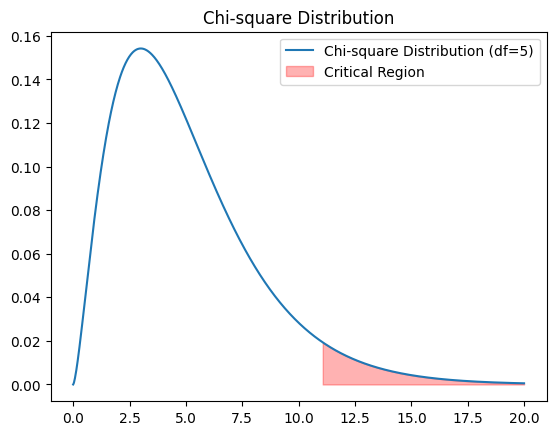

In [30]:
# 15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics
from scipy.stats import chi2

df = 5  # Degrees of freedom
x = np.linspace(0, 20, 1000)  # Range of x values
pdf = chi2.pdf(x, df)  # Probability density function for Chi-square distribution

plt.plot(x, pdf, label=f"Chi-square Distribution (df={df})")
plt.fill_between(x[x >= chi2.ppf(0.95, df)], pdf[x >= chi2.ppf(0.95, df)], color='red', alpha=0.3, label="Critical Region")
plt.title("Chi-square Distribution")
plt.legend()
plt.show()

In [31]:
# 16. Implement an F-test using Python to compare the variances of two random samples
from scipy.stats import f

group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(50, 15, 100)

# Calculate F-statistic
f_stat = np.var(group1, ddof=1) / np.var(group2, ddof=1)

# Degrees of freedom
dfn = len(group1) - 1  # Numerator degrees of freedom
dfd = len(group2) - 1  # Denominator degrees of freedom

# Calculate p-value
p_value = 2 * min(f.cdf(f_stat, dfn, dfd), 1 - f.cdf(f_stat, dfn, dfd))

print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

F-statistic: 0.53, P-value: 0.0019
Reject the null hypothesis


In [20]:
# 17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results
group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(55, 10, 100)
group3 = np.random.normal(60, 10, 100)

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

F-statistic: 21.45, P-value: 0.0000
Reject the null hypothesis


F-statistic: 23.76, P-value: 0.0000


<ipython-input-21-f3b62954a653>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])


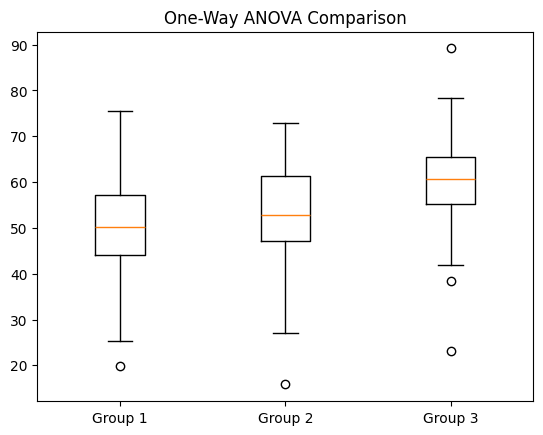

In [21]:
# 18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results
group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(55, 10, 100)
group3 = np.random.normal(60, 10, 100)

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")

plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])
plt.title("One-Way ANOVA Comparison")
plt.show()

In [22]:
# 19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA
from scipy.stats import shapiro, levene

group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(55, 10, 100)
group3 = np.random.normal(60, 10, 100)

# Normality test
for i, group in enumerate([group1, group2, group3]):
    stat, p = shapiro(group)
    print(f"Group {i+1} Shapiro-Wilk Test: Stat={stat:.2f}, P-value={p:.4f}")

# Equal variance test
stat, p = levene(group1, group2, group3)
print(f"Levene's Test: Stat={stat:.2f}, P-value={p:.4f}")

Group 1 Shapiro-Wilk Test: Stat=0.99, P-value=0.6975
Group 2 Shapiro-Wilk Test: Stat=0.97, P-value=0.0187
Group 3 Shapiro-Wilk Test: Stat=0.99, P-value=0.4696
Levene's Test: Stat=0.45, P-value=0.6356


                            sum_sq    df          F        PR(>F)
C(Factor1)             3864.206093   1.0  46.608790  7.830856e-10
C(Factor2)               56.459398   1.0   0.680995  4.112903e-01
C(Factor1):C(Factor2)     1.735443   1.0   0.020932  8.852667e-01
Residual               7959.094891  96.0        NaN           NaN


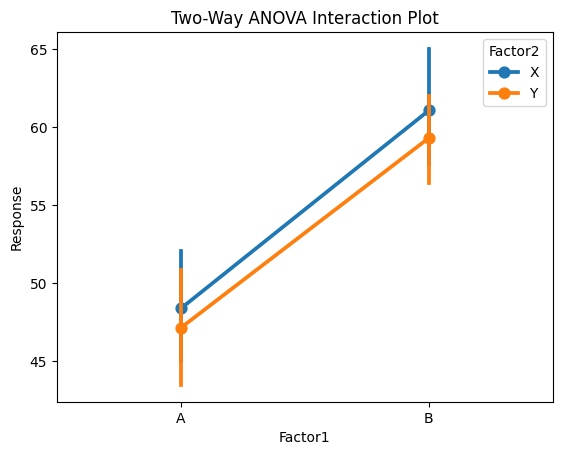

In [23]:
# 20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Simulate data
np.random.seed(42)
data = pd.DataFrame({
    'Factor1': np.repeat(['A', 'B'], 50),
    'Factor2': np.tile(np.repeat(['X', 'Y'], 25), 2),
    'Response': np.concatenate([np.random.normal(50, 10, 50), np.random.normal(60, 10, 50)])
})

# Perform two-way ANOVA
model = ols('Response ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Visualize interaction
import seaborn as sns
sns.pointplot(x='Factor1', y='Response', hue='Factor2', data=data)
plt.title("Two-Way ANOVA Interaction Plot")
plt.show()

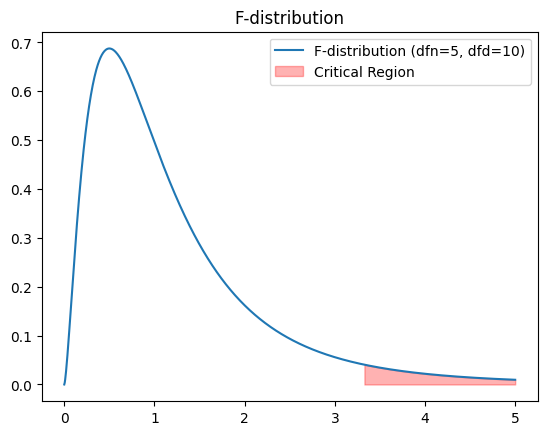

In [24]:
# 21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing
from scipy.stats import f

dfn, dfd = 5, 10  # Degrees of freedom (numerator, denominator)
x = np.linspace(0, 5, 1000)
pdf = f.pdf(x, dfn, dfd)

plt.plot(x, pdf, label=f"F-distribution (dfn={dfn}, dfd={dfd})")
plt.fill_between(x[x >= f.ppf(0.95, dfn, dfd)], pdf[x >= f.ppf(0.95, dfn, dfd)], color='red', alpha=0.3, label="Critical Region")
plt.title("F-distribution")
plt.legend()
plt.show()

F-statistic: 30.77, P-value: 0.0000


<ipython-input-25-839dc644f32d>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])


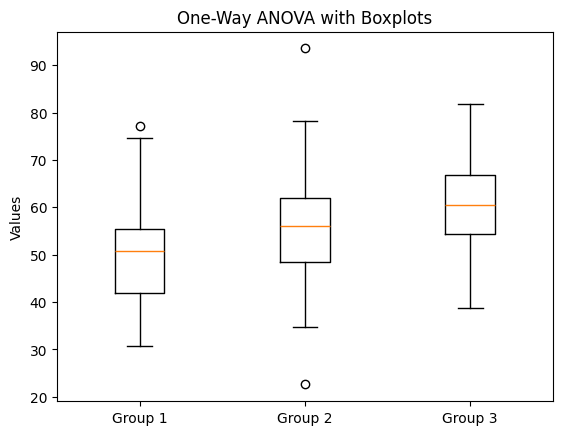

In [25]:
# 22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means
group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(55, 10, 100)
group3 = np.random.normal(60, 10, 100)

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")

plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])
plt.title("One-Way ANOVA with Boxplots")
plt.ylabel("Values")
plt.show()

In [ ]:
# 23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means
from scipy.stats import ttest_1samp

# Simulate random data
data = np.random.normal(50, 10, 100)  # Mean = 50, Std Dev = 10, Sample Size = 100
pop_mean = 50  # Null hypothesis: Population mean = 50

# Perform one-sample T-test
t_stat, p_value = ttest_1samp(data, pop_mean)

# Print results
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

In [26]:
# 24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results
from scipy.stats import chi2

sample_variance = 12
n = 100
pop_variance = 10

chi2_stat = (n - 1) * sample_variance / pop_variance
p_value = 2 * min(chi2.cdf(chi2_stat, n - 1), 1 - chi2.cdf(chi2_stat, n - 1))

print(f"Chi-square Statistic: {chi2_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Chi-square Statistic: 118.80, P-value: 0.1708
Fail to reject the null hypothesis


In [27]:
# 25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups
from statsmodels.stats.proportion import proportions_ztest

successes = [30, 40]  # Number of successes in each group
samples = [100, 100]  # Total samples in each group

z_stat, p_value = proportions_ztest(successes, samples)
print(f"Z-statistic: {z_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Z-statistic: -1.48, P-value: 0.1382
Fail to reject the null hypothesis


F-statistic: 0.59, P-value: 0.0091
Reject the null hypothesis


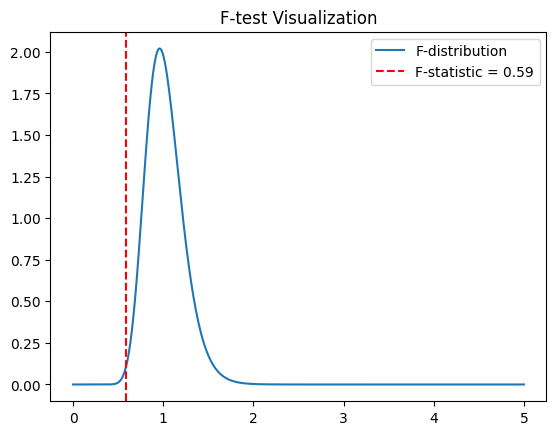

In [28]:
# 26. Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results
group1 = np.random.normal(50, 10, 100)
group2 = np.random.normal(50, 15, 100)

f_stat = np.var(group1, ddof=1) / np.var(group2, ddof=1)
p_value = 2 * min(f.cdf(f_stat, 99, 99), 1 - f.cdf(f_stat, 99, 99))

print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Visualize
x = np.linspace(0, 5, 1000)
pdf = f.pdf(x, 99, 99)
plt.plot(x, pdf, label="F-distribution")
plt.axvline(f_stat, color='red', linestyle='--', label=f"F-statistic = {f_stat:.2f}")
plt.title("F-test Visualization")
plt.legend()
plt.show()

In [29]:
# 27. Perform a Chi-square test for goodness of fit with simulated data and analyze the results
observed = [20, 30, 50]
expected = [25, 25, 50]  # Expected distribution

chi2_stat, p_value = chisquare(observed, f_exp=expected)
print(f"Chi-square Statistic: {chi2_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Chi-square Statistic: 2.00, P-value: 0.3679
Fail to reject the null hypothesis
